In [1]:
!python --version
!pip freeze | grep scipy
!pip freeze | grep pandas
!pip freeze | grep numpy
!pip freeze | grep matplotlib
!pip freeze | grep numba

Python 3.8.1
scipy==1.4.1
pandas==1.0.1
numpy==1.18.1
matplotlib==3.1.3
numba==0.49.0


### Imports

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd

from scipy import stats

from matplotlib import pyplot as plt

from pyfiles.RefactorKDE_methods import method_silverman, method_abramson, method_RVKDE, method_ERVKDE, MSE

import time

### Main()

In [3]:
def main(NUM_SAMPLES=1000, condition=None, DIMENSION=2, plot=True, figname='kde_fig', save = True):
    
    if condition == None:
        condition = [
            [[0,0], [[1,0],[0,1]]]
                    ]
    
    xs = np.linspace(-4,4,100)
    ys = np.linspace(-4,4,100)
    X,Y = np.meshgrid(xs, ys)
    tofit = np.array([[x,y] for y in ys for x in xs])
    
    datas = []
    densities = 0
    for cond in condition:
        datas += [np.random.multivariate_normal(*cond, NUM_SAMPLES)]
        densities += stats.multivariate_normal.pdf(tofit, *cond)
        
    data = np.vstack(np.array(datas))
    true_density = np.vstack(np.array(densities))
    
    X_data, Y_data = data[:,0], data[:,1]
    
    data = np.array(data)
    true_density = np.array(true_density)
    xs = np.array(xs)
    ys = np.array(ys)

    # Methods
    silverman_results = method_silverman(data, tofit)
    RVKDE_results = method_RVKDE(data, xs, ys, DIMENSION)
    ERVKDE_results = method_ERVKDE(data, xs, ys, DIMENSION)
    abramson_results = method_abramson(data, xs, ys, DIMENSION)
    
    # Plots
    if plot==True:
        
        silverman_results = silverman_results.reshape(100,100)
        RVKDE_results = RVKDE_results.reshape(100,100)
        ERVKDE_results = ERVKDE_results.reshape(100,100)
        abramson_results = abramson_results.reshape(100,100)
        true_density = true_density.reshape(100,100)
        
        
        method_data = {'Silverman': [X, Y, silverman_results],
                       'RVKDE': [X, Y, RVKDE_results],
                       'ERVKDE': [X, Y, ERVKDE_results],
                       'Abramson': [X, Y, abramson_results],
                       'Distribution':[X,Y,true_density],
                       'Data':[X_data,Y_data],
                      }
        
        method_names = list(method_data.keys())

        plt.figure(figsize=(20,10))

        jump = 0 # used to move plots to next line
        for i in range(len(method_names)):
            method_name = method_names[i]
            ax = plt.subplot(f'24{i+1+jump}')

            if method_name == 'Data':
                plt.scatter(*method_data[method_name],alpha=0.5) # alpha=0.1
#                 jump += 2
            else:
                ax.contourf(*method_data[method_name])

            ax.set_title(f"{method_name}")
            ax.set(xlabel="X", ylabel="Y")
            ax.set_facecolor('#44146f')

        plt.tight_layout(pad=1.0)
        if save == True:
            plt.savefig(f'{figname}.png')
        plt.show()

        
    silverman_results = silverman_results.flatten()
    RVKDE_results = RVKDE_results.flatten()
    ERVKDE_results = ERVKDE_results.flatten()
    abramson_results = abramson_results.flatten()
    true_density = true_density.flatten()

    # MSE
    MSE_silverman = MSE(true_density, silverman_results)
    MSE_RVKDE = MSE(true_density, RVKDE_results)
    MSE_ERVKDE = MSE(true_density, ERVKDE_results)
    MSE_abramson = MSE(true_density, abramson_results)
    
    MSEs = [MSE_silverman, MSE_RVKDE, MSE_ERVKDE, MSE_abramson]
    
    return MSEs
    

### Runs

In [4]:
# # Condition 1
# means = [[-1.5,0],[1.5,0]]
# covs = [
#     [[1,0],[0,1]],
#     [[1,0],[0,1]],
#        ]
# condition = list(zip(means, covs))


# # Condition 2
# means = [[-2,0],[2,0],[0,2],[0,-2]]
# covs = [
#     [[1,0],[0,2]],
#     [[1,0],[0,1]],
#     [[2,0],[0,2]],
#     [[1,0],[0,1]]
#        ]
# condition = list(zip(means, covs))


# # Condition 3
# means = [[-2,0],[2,0],[0,2],[0,-2],[0,0]]
# covs = [
#     [[1,0],[0,1]],
#     [[1,0],[0,1]],
#     [[1,0],[0,1]],
#     [[1,0],[0,1]],
#     [[1,0],[0,1]]
#        ]
# condition = list(zip(means, covs))

/home2/john_gilbert/_mystuff/mynbs/pyfiles/RefactorKDE_methods.py:90: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "rvkde_sigmas" failed type inference due to: Untyped global name 'KDTree': cannot determine Numba type of <class 'type'>

File "pyfiles/RefactorKDE_methods.py", line 102:
def rvkde_sigmas(samples, K=None, BETA=2, DIMENSION=2, smoothing=True):
    <source elided>
    
    tree = KDTree(samples, int(K*1.5))
    ^

  @jit(looplift=True)
/home2/john_gilbert/_mystuff/mynbs/pyfiles/RefactorKDE_methods.py:90: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "rvkde_sigmas" failed type inference due to: Untyped global name 'KDTree': cannot determine Numba type of <class 'type'>

File "pyfiles/RefactorKDE_methods.py", line 102:
def rvkde_sigmas(samples, K=None, BETA=2, DIMENSION=2, smoothing=True):
    <source elided>
    
    tree = KDTree(samples, int(K*1.5))
    ^

  @jit(

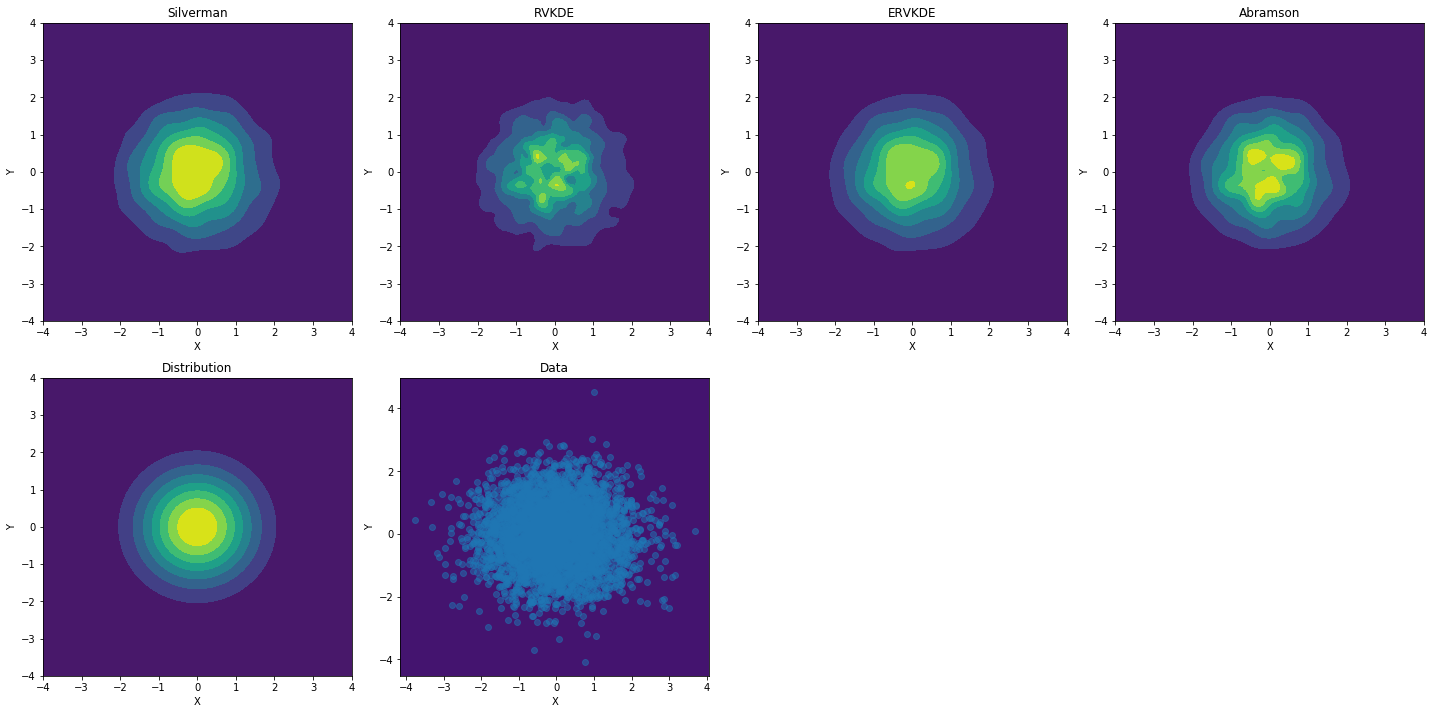

0: main complete -  48.184216260910034 seconds


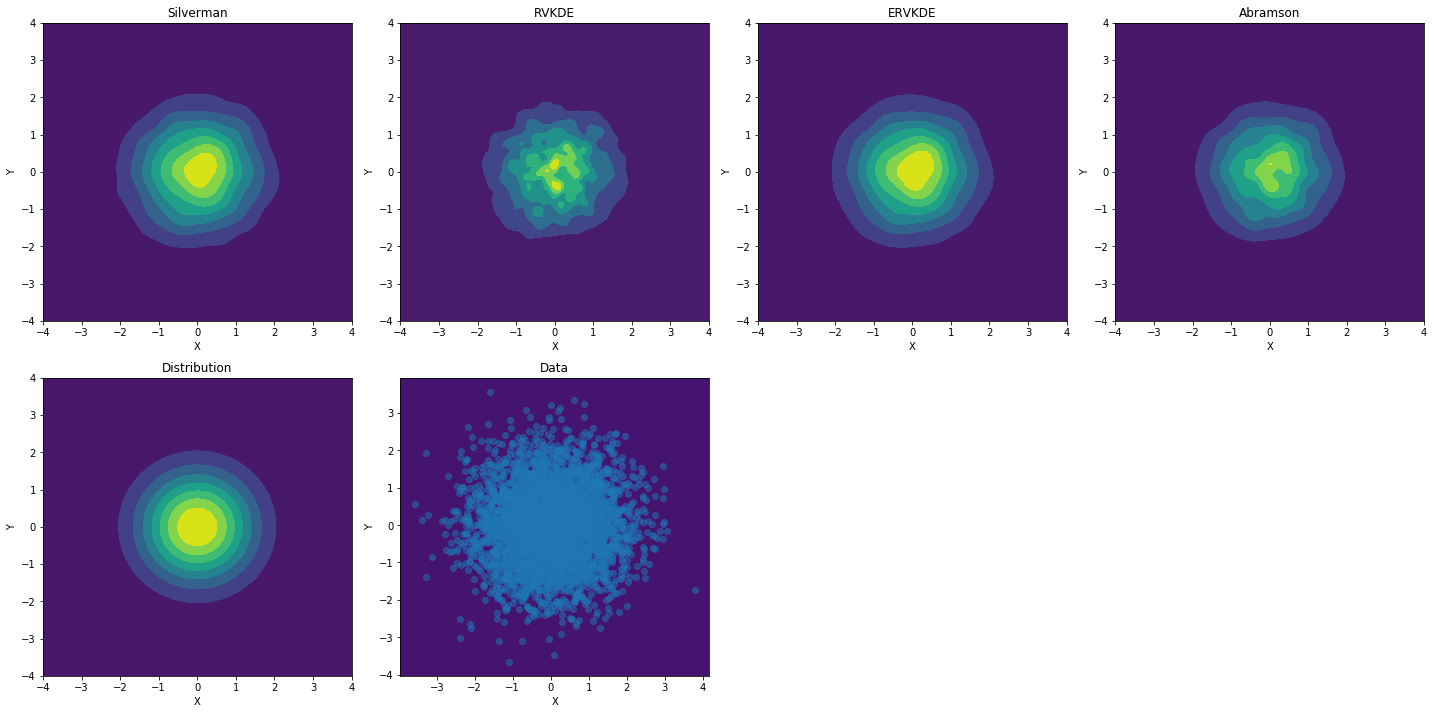

1: main complete -  43.988648653030396 seconds


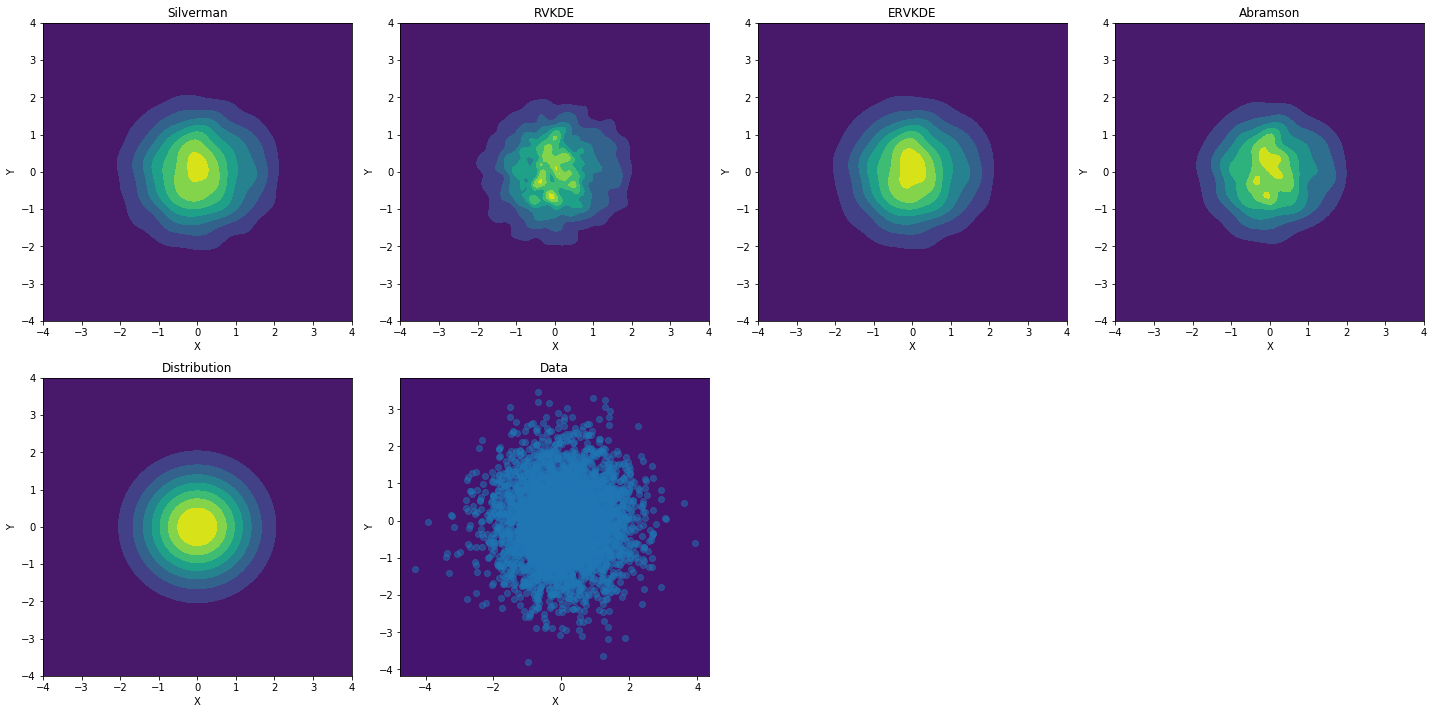

2: main complete -  43.82796597480774 seconds


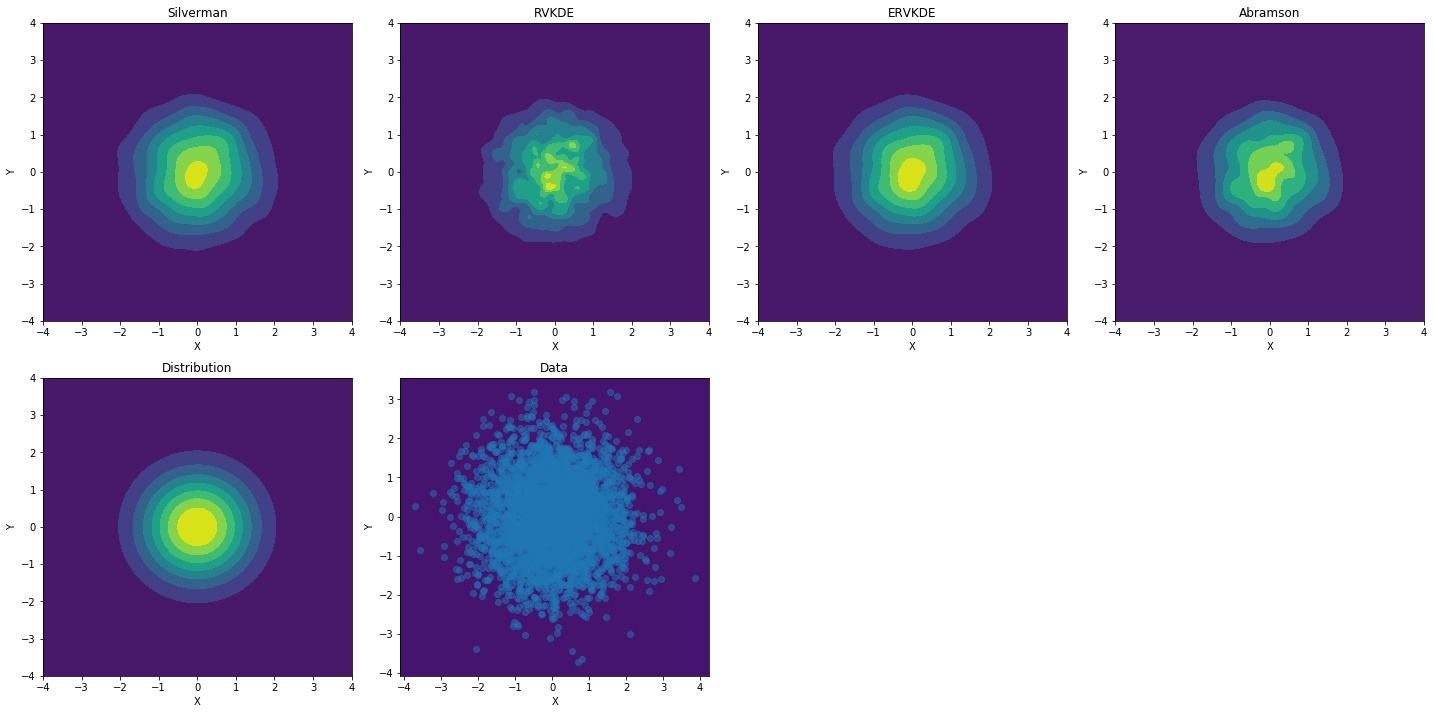

3: main complete -  43.87498116493225 seconds


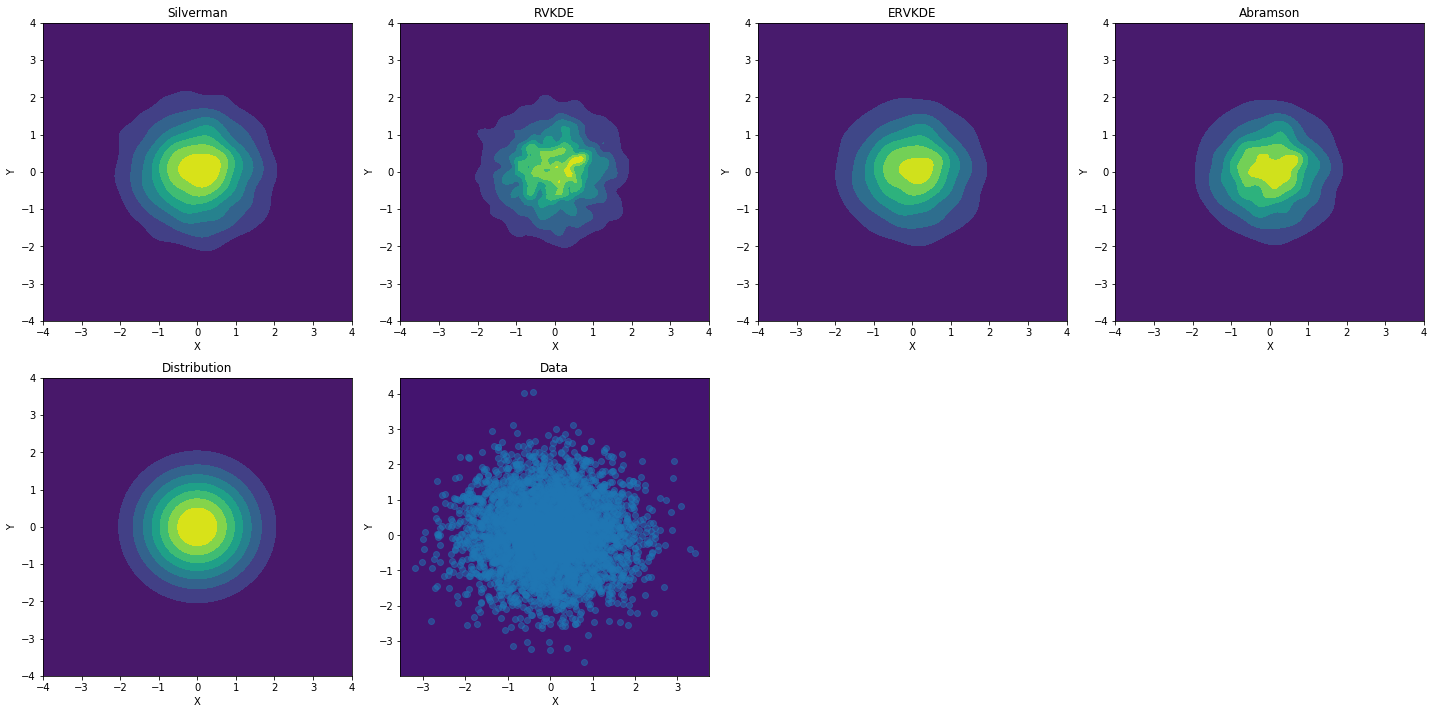

4: main complete -  43.96767473220825 seconds


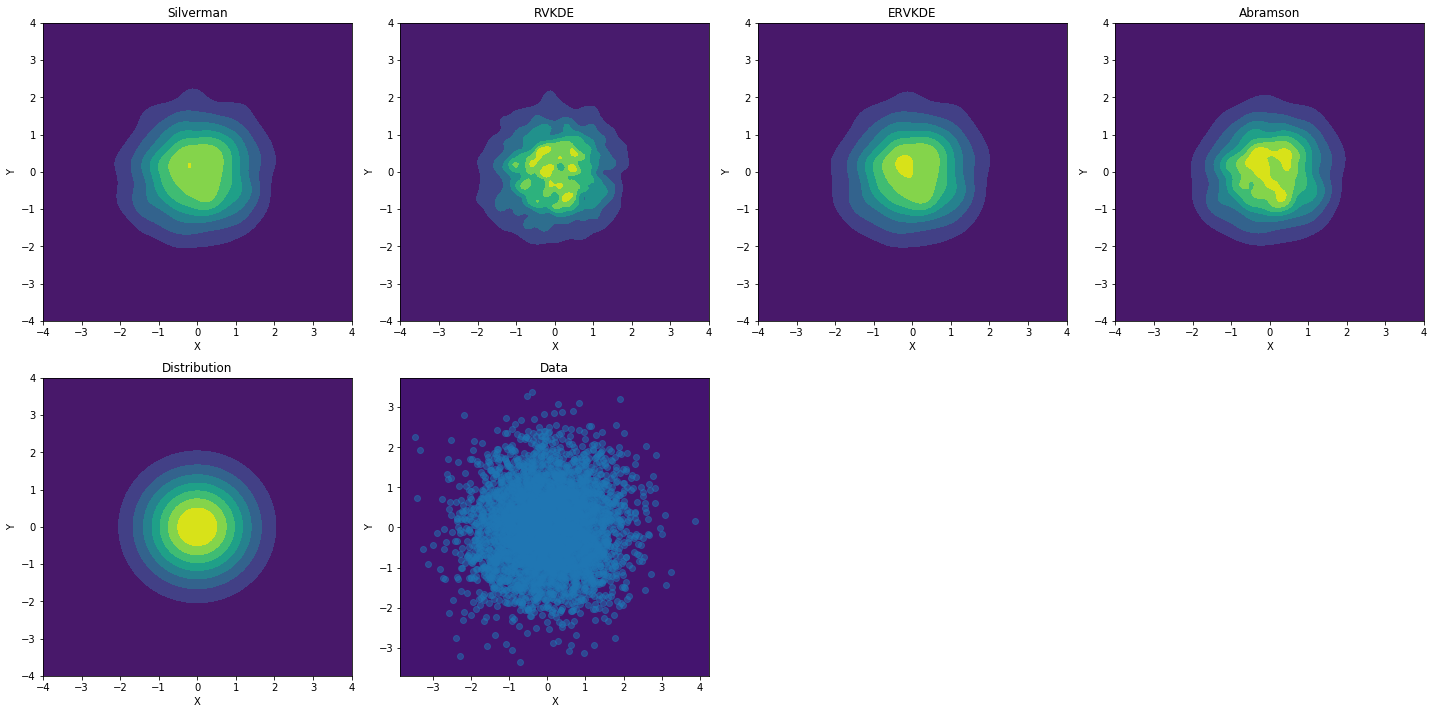

5: main complete -  44.23151659965515 seconds


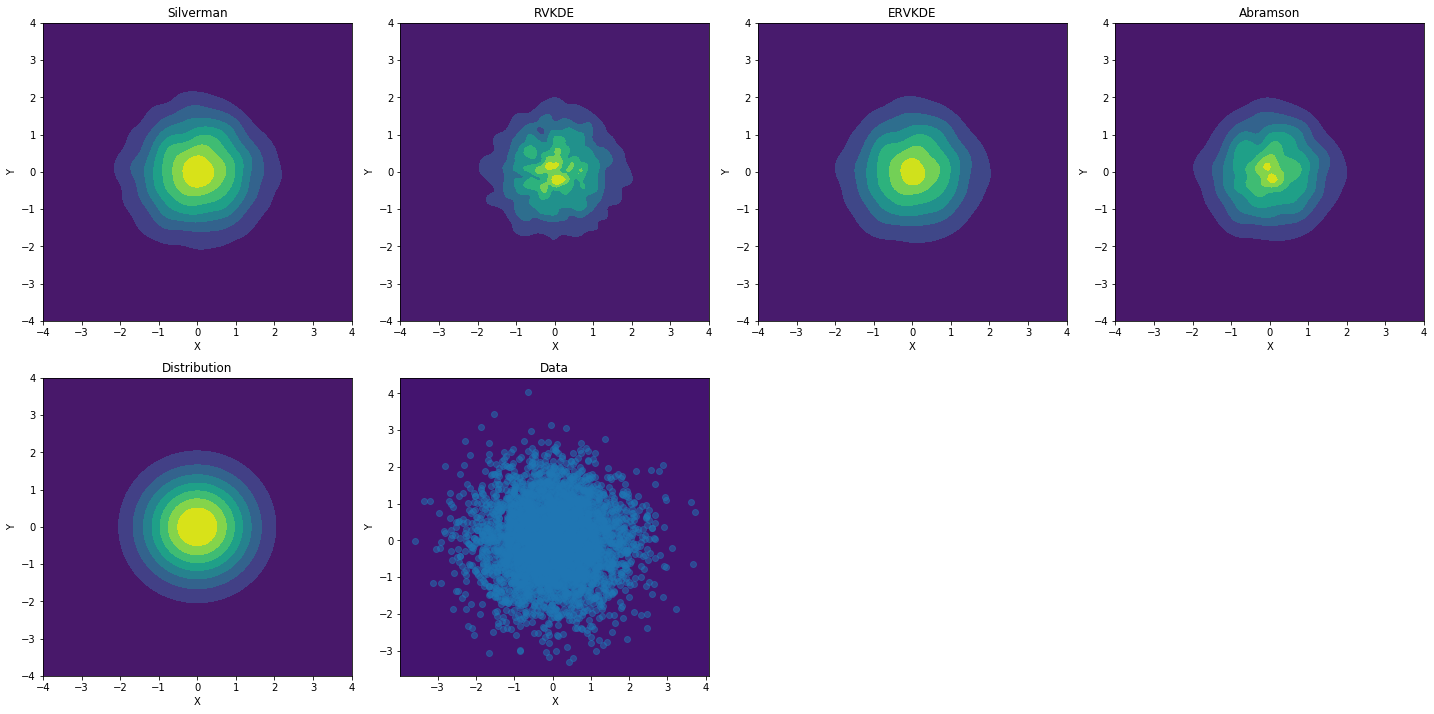

6: main complete -  43.879202127456665 seconds


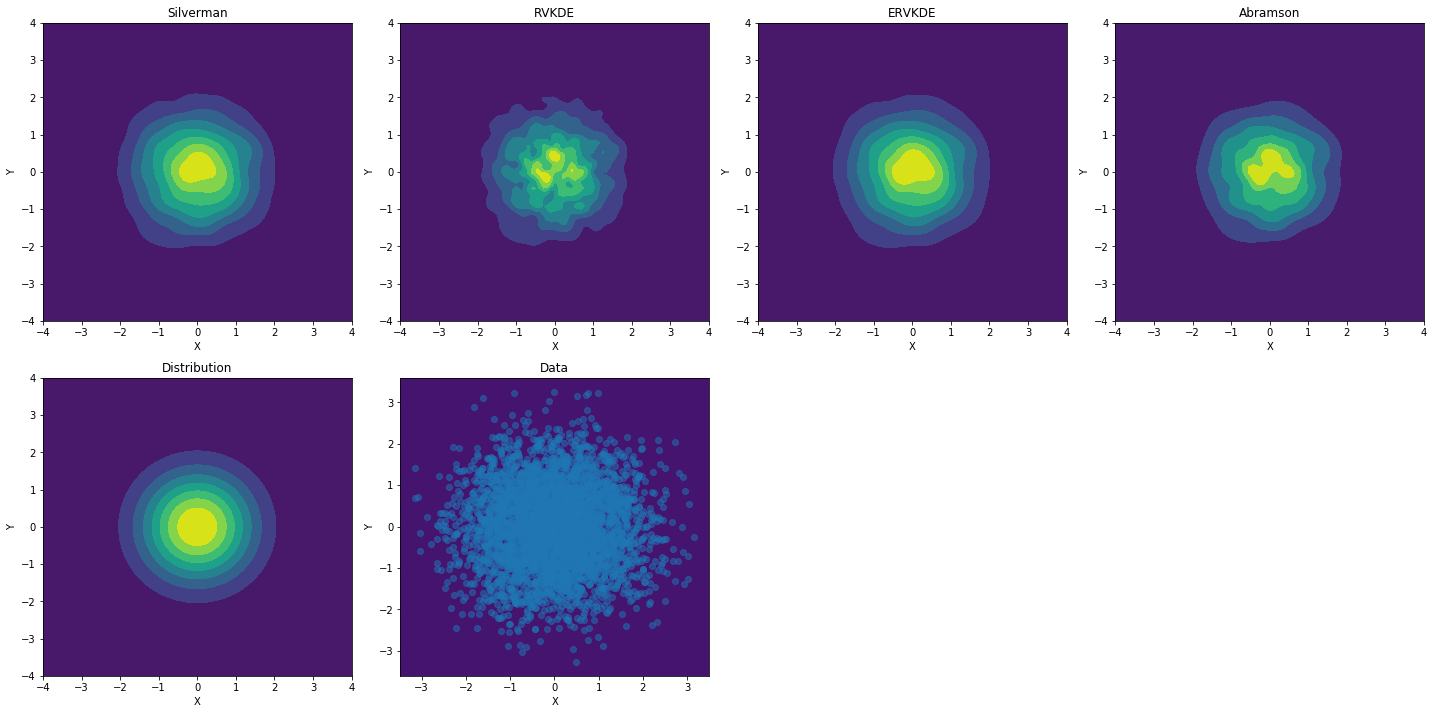

7: main complete -  44.16003632545471 seconds


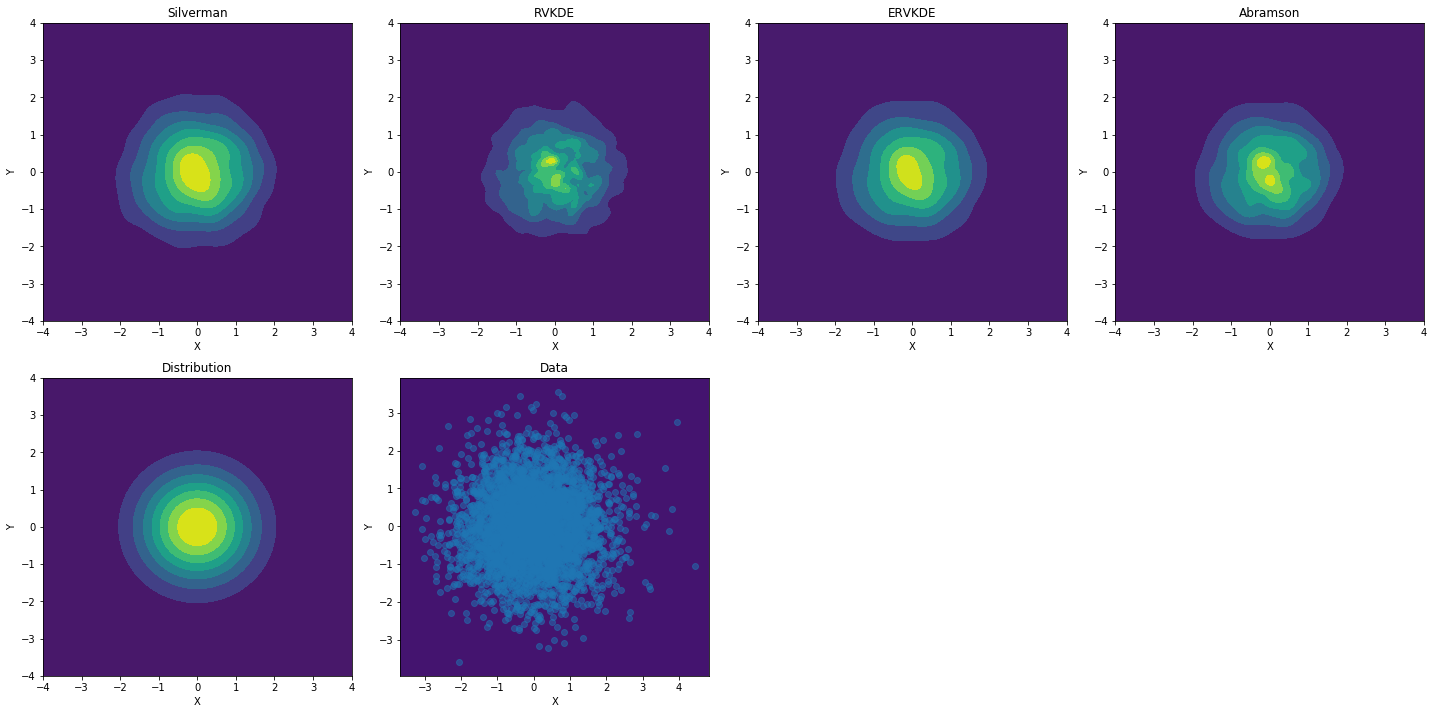

8: main complete -  44.24898052215576 seconds


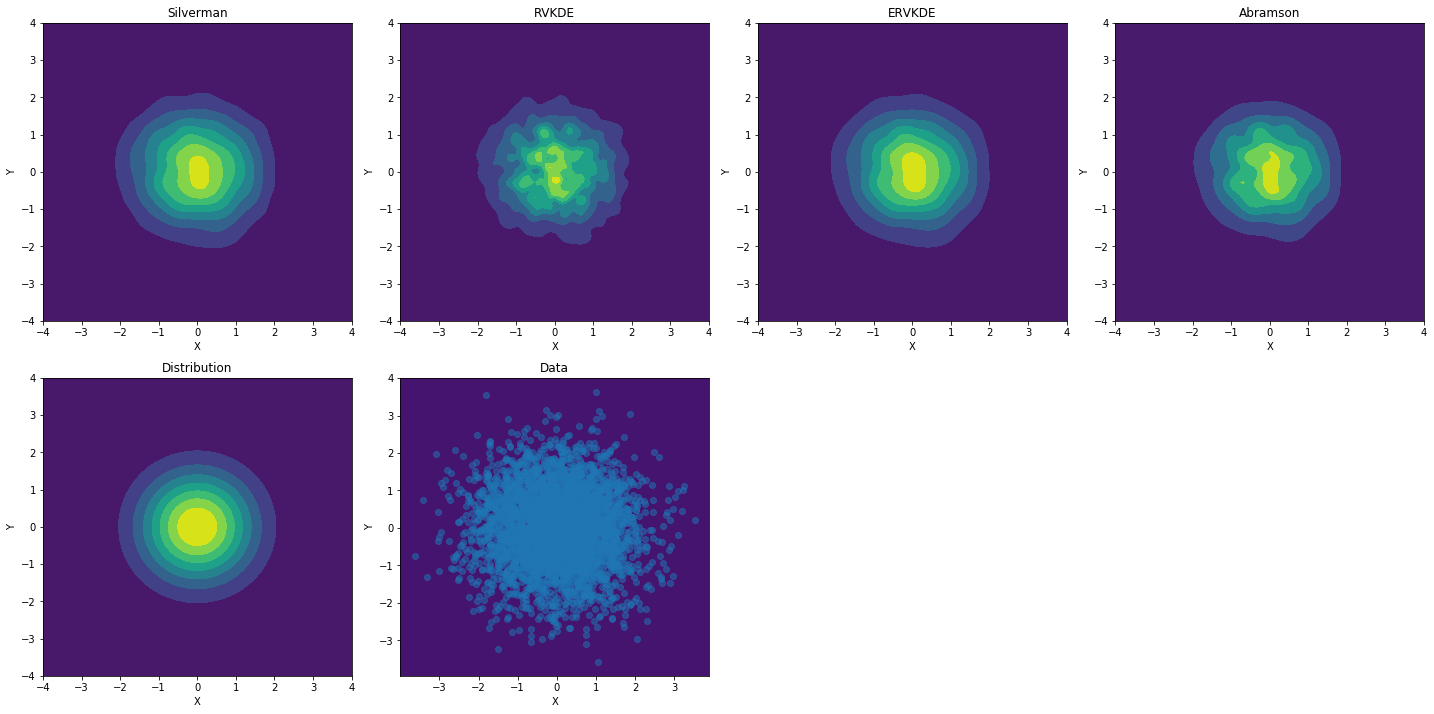

9: main complete -  44.17724370956421 seconds
 
Silverman :  6.825139168506681e-06
RVKDE     :  2.4354802576745013e-05
E-RVKDE   :  5.677983633825511e-06
Abramson  :  1.0243917565411862e-05


In [5]:

# Get average results over 10 runs
silverman_avg = []
rvkde_avg = []
ervkde_avg = []
abramson_avg = []

for run in range(10):
    t1 = time.time()
    silverman, rvkde, ervkde, abramson = main(NUM_SAMPLES=4000, figname=f'kde_4000_{run}', save=True)
    t = time.time() - t1
    print(f"{run}: main complete -  {t} seconds")
    
    silverman_avg += [silverman]
    rvkde_avg += [rvkde]
    ervkde_avg += [ervkde]
    abramson_avg += [abramson]
    
print(" ")
print('Silverman : ', np.mean(silverman_avg))
print('RVKDE     : ', np.mean(rvkde_avg))
print('E-RVKDE   : ', np.mean(ervkde_avg))
print('Abramson  : ', np.mean(abramson_avg))